In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Gradient Boosted Regression Trees

Przejdźmy przez prosty przykład regresji, używając drzew decyzyjnych jako podstawowych predyktorów (oczywiście funkcja Gradient Boosting sprawdza się również w przypadku zadań klasyfikacji).

Nazywa się to Gradient Tree Boosting lub Gradient Boosted Regression Trees (GBRT). 


In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

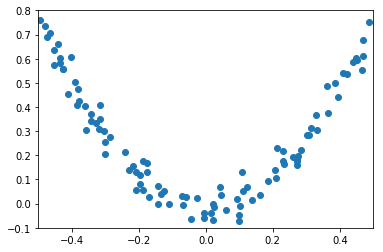

In [3]:
plt.figure()
plt.scatter(X, y)
plt.xlim([-0.5, 0.5])
plt.ylim([-0.1, 0.8])
#plt.axis("equal")
plt.show()

Najpierw nauczmy DecisionTreeRegressor:

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Teraz nauczmy drugie DecisionTreeRegressor na błędach pierwszego predyktora:

In [5]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Następnie uczymy trzecią regresję na błędach drugiego modelu:

In [6]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Teraz mamy komitet zawierający trzy drzewa. Może przewidywać etykietę na nowycm pukcie, po prostu sumując przewidywania wszystkich drzew:

In [7]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [8]:
y_pred

array([0.75026781])

Poniższy wykres pokazuje przewidywania tych trzech kolejnych drzew w lewej kolumnie i komitetu w prawej kolumnie.

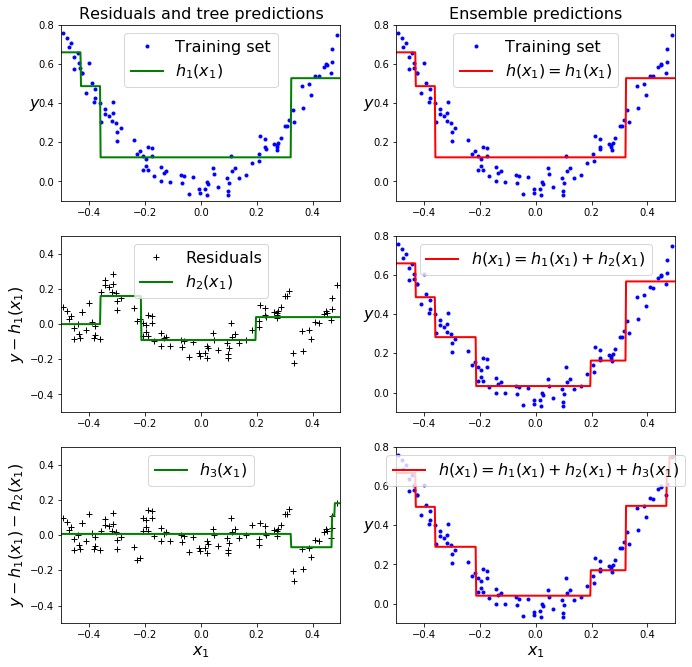

In [9]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)


plt.show()


Gradient Boosted Regression Trees można użyć bezpośrednio ze Scikit-Learn.


In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [11]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

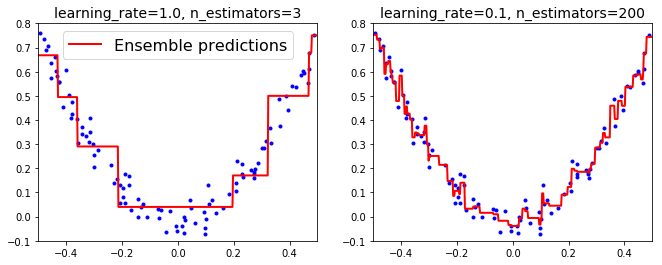

In [12]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

Możemy też użyć

https://xgboost.readthedocs.io/en/latest/python/index.html

W ostatnich latach najbardziej popularnym algorytmem *boostingu* (i prawdopodobnie najczęściej używanym algorytmem uczenia maszynowego) jest *Gradient Boosting*, a konkretnie jego implementacja `xgboost` (E**x**treme **g**radient **b**oosting). Spójrzmy najpierw, jaka jest ogólna idea *gradient boostingu*.

Nasz klasyfikator ma postać 

$$ F(\mathbf x) = f_1 (\mathbf x) + f_2 (\mathbf x) + \ldots + f_n (\mathbf x) =  \sum_{i=1}^{n} f_i (\mathbf x) ,$$

gdzie $f_i (\mathbf x)$ to jakiś słaby klasyfikator (najczęściej drzewo decyzyjne).

Uproszczony schemat uczenia wygląda następująco:
1. Dopasuj model $F_0(\mathbf x)$ do wartości $y$.  
2. W i-tym kroku:  
    * oblicz błędy $d_i(\mathbf x) = y - F_{i-1}(\mathbf x)$,  
    * dopasuj model $f_i(\mathbf x)$ do błędów $d_i(\mathbf x)$,
    * $F_i(\mathbf x) = F_{i-1}(\mathbf x) + f_i(\mathbf x)$.
    


#### XGBoost

*XGBoost* realizuje ten schemat w nieco bardziej ogólnej formie - zamiast liczyć dokładne błędy, obliczamy funkcję straty między predykcjami a prawdziwymi wartościami. Załóżmy, że mamy zatem daną funkcję straty 
$$l(y, \hat y), $$
gdzie $y$ to prawdziwa wartość, a $\hat y$ to predykcja, czyli nasze $F(\mathbf x)$ .  

To, co chcemy optymalizować w $t$-tym kroku (czyli przy budowaniu modelu $f_t$), to funkcja celu równa:

$$ Obj = \sum_{i=0}^n l(y_i, \hat y_i^{(t)}) + \sum_{k=0}^t \Omega(f_k).$$  

$\hat y_i^{(t)}$ oznacza tutaj wartość predykcji dla $i$-tej obserwacji w $t$-tym kroku budowania modelu.

Ponieważ nasza predykcja $\hat y_i$ jest sumą kolejnych modeli $f_0, \ldots, f_{i-1}$, możemy naszą funkcję straty zapisać w następujący sposób:

$$l(y_i, \hat y_i^{(t)}) = l(y_i, \hat y_i^{(t-1)} + f_t(x_i)) $$

Dla chętnych ciąg dalszy: https://xgboost.readthedocs.io/en/latest/model.html

Pozostaje nam pytanie, czym jest $\Omega$? To funkcja regularyzująca nasz model. Korzystamy z drzew decyzyjnych, które bardzo łatwo potrafią dopasować się do danych, dlatego musimy uważać, aby nie przeuczyć naszego modelu. 

I to właśnie szerokie możliwości regularyzacji są jedną z największych zalet algorytmu *xgboost*. To, na co mamy wpływ, to zarówno wkład każdego drzewa do całego modelu (czyli wielkość wag w liściach), jak i sam proces budowania modelu.  

Parametry regularyzujące model *xgboost*:
* gamma - minimalny spadek funkcji straty wymagany do zrobienia podziału w drzewie  
* min_child_weight - ograniczenie na minimalną ilość obserwacji w liściu
* max_delta_step - maksymalna wartość wagi w liściu
* learning_rate - czynnik, przez który mnożone jest każde drzewo, aby zmniejszyć jego wpływ na cały model
* reg_alpha - kara l1 na wagi w drzewie
* reg_lambda - kara l2 na wagi w drzewie

Oprócz tego, mamy również do dyspozycji parametry kontrolujące samo budowanie modelu:
* max_depth - maksymalna głebokość drzewa
* n_estimators - liczba drzew
* subsample - odsetek obserwacji użyty w każdym drzewie
* colsample_bytree - odsetek kolumn użyty w każdym drzewie
* colsample_bylevel - odsetek kolumn użyty w każdym poziomie drzewa

Bardzo fajne narzędzie pozwalające zobaczyć jak wyglądają obszary decyzyjne kolejnych drzew w zależności od parametrów:
https://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html

In [13]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

In [16]:
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
print(y_pred)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

[ 1.8133688e-01  1.8133688e-01 -3.8414419e-02  1.8425870e-01
  4.8237413e-02 -1.1697412e-02 -1.6712844e-02  8.8122964e-02
  5.9836417e-01  5.8294713e-01  3.6986542e-01  2.7801144e-01
  3.6986542e-01  1.6290128e-02  5.8055854e-01  9.3018264e-02
  1.2511951e-01  3.8400292e-02  5.8055854e-01 -2.1797419e-04
  1.8133688e-01  5.8055854e-01  2.3275834e-01  4.3506175e-01
  6.7720068e-01]
Validation MSE: 0.0028512559726563943


Zainstaluj

```python
pip install graphviz
```

<Figure size 1080x1080 with 0 Axes>

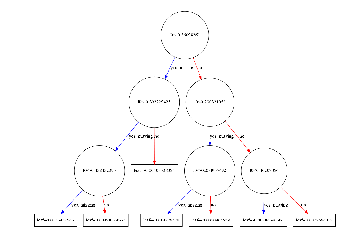

In [21]:
xgboost.plot_tree(xgb_reg, num_trees=2)
plt.show()

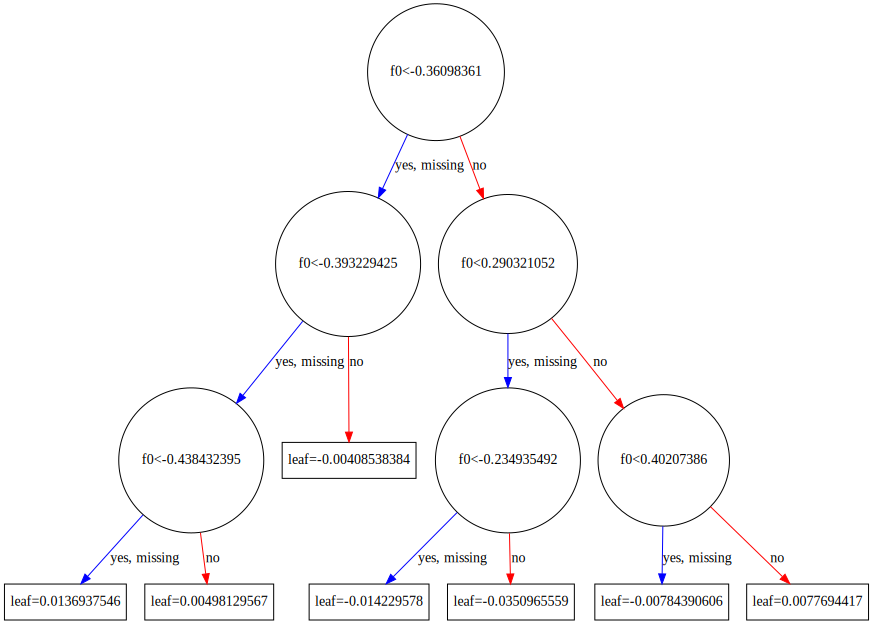

In [25]:
xgboost.to_graphviz(xgb_reg, num_trees=2)


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import GradientBoostingClassifier